## Kütüphaneler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sahte Veri Oluşturma

In [ ]:
data = {
    "Yıl": np.arange(2010, 2021),
    "Satış": np.random.randint(100, 500, 11),
    "Masraf": np.random.randint(50, 400, 11)
}

df = pd.DataFrame(data)

regions = ["Kuzey", "Güney", "Doğu", "Batı"]

df["Bölge"] = np.random.choice(["Kuzey", "Güney", "Doğu", "Batı"], 
                               df.shape[0])

df

,Yıl,Satış,Masraf,Bölge
0,2010,175,278,Kuzey
1,2011,115,131,Güney
2,2012,495,375,Batı
3,2013,397,281,Batı
4,2014,209,398,Doğu
5,2015,230,117,Güney
6,2016,229,345,Kuzey
7,2017,244,133,Batı
8,2018,334,180,Kuzey
9,2019,184,343,Batı


## Kısa Tekrar

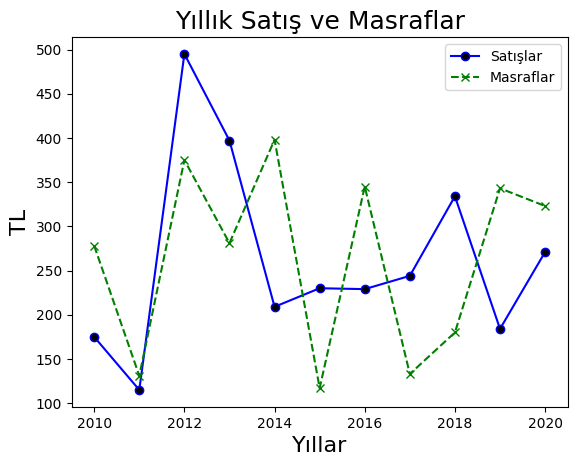

In [ ]:
plt.plot(df["Yıl"], df["Satış"],
         label="Satışlar",
         linestyle = "-",
         marker="o", color="blue",
         markerfacecolor="black")

# Soru: Yıl ve Masrafı aynı plota ekleyin.
# Satış ve Masraf aynı figure içersinde olacak.
# Marker: "x"
plt.plot(df["Yıl"], df["Masraf"],
         label="Masraflar",
         linestyle = "--",
         marker="x", color="green")

plt.title("Yıllık Satış ve Masraflar", fontsize = 18)
plt.xlabel("Yıllar", fontsize = 16)
plt.ylabel("TL", fontsize = 16)

plt.legend()
plt.show()

## plt.bar()
`plt.bar()` bir sütun grafiği çizer. Bu grafik türü, kategorilerin değerleri arasındaki ilişkiyi gösterir.

### Parametreler
`color`: Sütunların rengini belirtir.

`width`: Sütunların genişliğini kontrol eder

`edgecolor`: Sütunların kenarlık rengini belirler

`linewidth`: Kenarlık kalınlığını belirtir.

<BarContainer object of 5 artists>

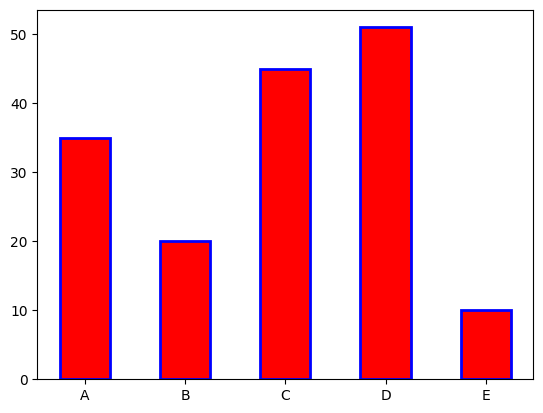

In [ ]:
categories = ["A", "B", "C", "D", "E"]
values = [35, 20, 45, 51, 10]

plt.bar(categories, values, color = "red",
        width = 0.5, edgecolor="blue", linewidth=2)

### Soru: Aşağıda verilen veri kümesindeki Şehir ve Nüfus değerlerini kullanarak bir barplot çiziniz:

```python
data = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'], 
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }
```

- Cevabı discordda verildi.

<BarContainer object of 5 artists>

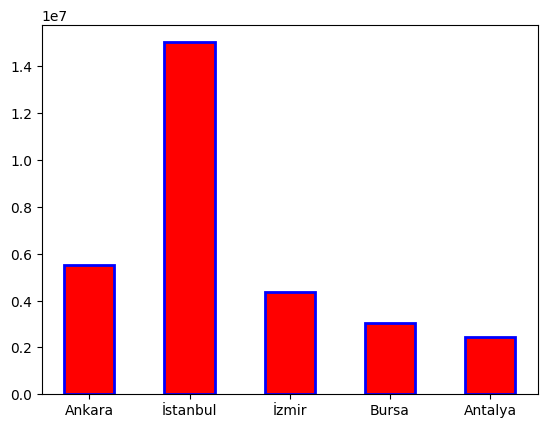

In [ ]:
data_dict = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'], 
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }

# scientific notation
plt.bar(data_dict["Şehir"], data_dict["Nüfus"], color = "red",
        width = 0.5, edgecolor="blue", linewidth=2)

In [ ]:
sales_by_region = df.groupby("Bölge")["Satış"].sum()
sales_by_region

Bölge
Batı     1320
Doğu      209
Güney     616
Kuzey     738
Name: Satış, dtype: int64

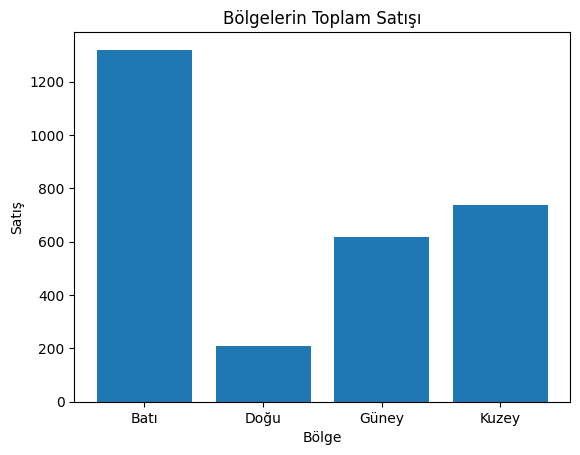

In [ ]:
plt.bar(sales_by_region.index,
        sales_by_region.values)
plt.xlabel("Bölge")
plt.ylabel("Satış")
plt.title("Bölgelerin Toplam Satışı")
plt.show()

In [ ]:
df

,Yıl,Satış,Masraf,Bölge
0,2010,175,278,Kuzey
1,2011,115,131,Güney
2,2012,495,375,Batı
3,2013,397,281,Batı
4,2014,209,398,Doğu
5,2015,230,117,Güney
6,2016,229,345,Kuzey
7,2017,244,133,Batı
8,2018,334,180,Kuzey
9,2019,184,343,Batı


## Histogram Mantığı

<BarContainer object of 10 artists>

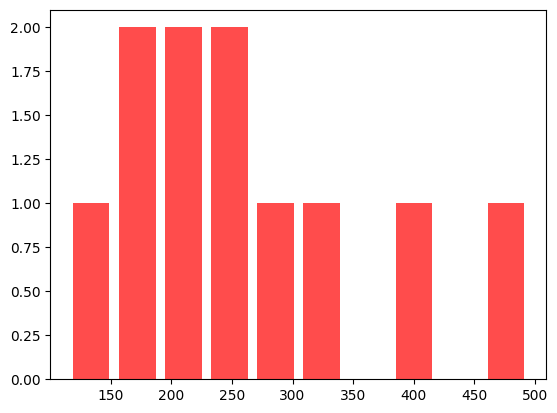

In [ ]:
sales_bins = pd.cut(df["Satış"], bins=10)
# iki fonksiyon var. pd.cut ve pd.qcut
# bin: numerik datanın grubu olarak düşünülebilir
# - (114.999, 175.0] --> bin'i ifade eder.
# pandas cut: bin arası mesafe eşit - her bin'de eşit sayıda eleman olmayabilir.
# bin aralığı: 175 - 114 = 61, 236 - 175 = 61 gibi..

# pandas qcut: bin arası mesafe eşit değil - her bin'de eşit sayıda eleman olacak şekilde ayırır.
bin_counts = sales_bins.value_counts().sort_index()

# bin'lerdeki aralığın orta değerini alır
bin_middles = [(interval.left + interval.right) / 2 for interval in bin_counts.index]

plt.bar(bin_middles,
        bin_counts.values,
        width = 30, alpha = 0.7,
        color="red")

## plt.hist()

``plt.hist()`` fonksiyonu, verilerin dağılımını göstermek için bir histogram grafiği çizer. Histogramlar, verilerin sıklığını veya yoğunluğunu görselleştirmek için kullanılır.

### Parametreler
`bins`: Grup sayısını belirler.

`range`: Bin'lerin alt ve üst limitini belirler.

`density`: True olursa grafik yoğunluk belirtir, false olursa frekans belirtir.

`color`: Bin rengi

`alpha`: Saydamlık opaklık

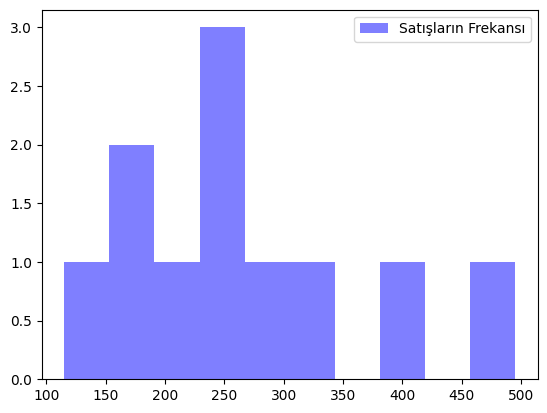

In [ ]:
plt.hist(df["Satış"], bins = 10, alpha = 0.5,
         color="blue", label = "Satışların Frekansı")
plt.legend()
plt.show()

### Soru: numpy ile random veri oluşturup plt.hist() ile frekansını görselleştirin.
- np.random.randn faydalanabilirsiniz.
- Veri sayısı 1000 olsun.
- bins = 30 olsun
- renk vb. farketmez.

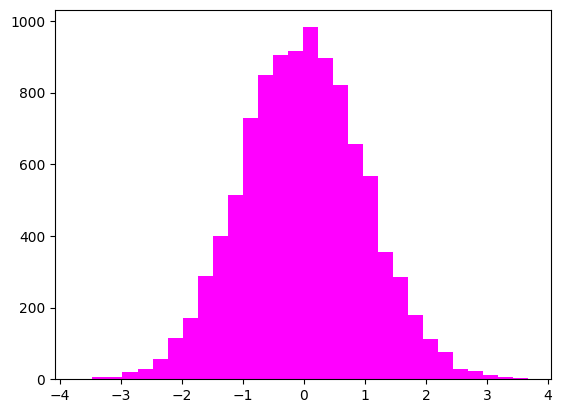

In [ ]:
data_normal = np.random.randn(10000)
plt.hist(data_normal, bins=30, color="magenta")
plt.show()

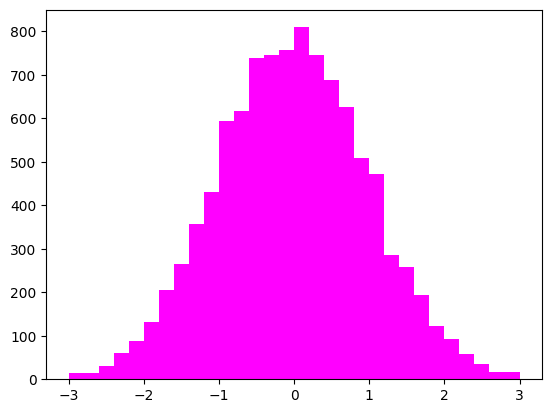

In [ ]:
# Min-Max değişti
plt.hist(data_normal, bins=30, color="magenta",
         range=(-3, 3))
plt.show()

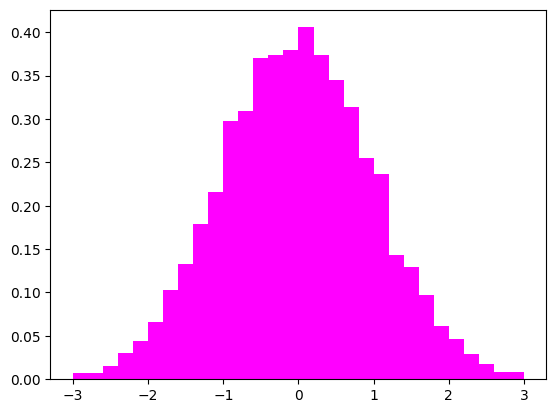

In [ ]:
# y ekseni değişti, yoğunluk gosteriyor, normalize değerler.
plt.hist(data_normal, bins=30, color="magenta",
         range=(-3, 3), density = True)
plt.show()